In [1]:
# 데이터 불러오기 
import pandas as pd
import numpy as np
import random as rnd

In [2]:
# 시각화 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
 # 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
import warnings 
warnings.filterwarnings(action='ignore')

In [5]:
# 데이터셋 불러오기 
train_df  = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
# 모델 적용의 일관성을 위해 train 과 test를 합한 combine 도 지정
combine = [train_df, test_df]

In [6]:
# print(combine) # 리스트 형태. dataframe의 형태 아님

# print(train_df.info())  # dataframe

In [7]:
 # 데이터 변수 보기
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.info()
# 전체 12 col, 891개 index 존재
# 자료들은 non-null 하고, 몇개 빼고는 int나 float 의 숫자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# 테스트 자료 정보 
test_df.info() 
# 생존 여부 행이 빠져 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
 ### 데이터 분석

In [12]:
# train 자료 int, float 통계치 
# int와 float형태의 숫자형만 자동으로 계산해줌
train_df.describe()

# 훈련샘플치 count : 891개
# 생존률 0.38 -> 38%
# age min 이 왜 0.42? 1살도 안된 애기도 있단건가 max는 80세

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 훈련 자료 object 변수 통계치 
train_df.describe(include = ['O'])
# 대문자 alphabet o 임

# sex의 top이 male이고 freq 577 : 남성이 577명
# 승선지 Embaerked 의 top이 S이고 freq이 644명 : S 로 가는 승선지 644

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Niskanen, Mr. Juha",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [14]:
# 변수별 생존율 비교 
# Pclass/Sex/SibSp/Age/Parch/Ticket/Fare/Cabin/Embarked

In [15]:
# Pclass
# groupby를 Pclass로 하고 보여줄 결과는 Pclass와 Survivied

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# groupby에 as_index F 하면 Pclass를 index로 사용하지 않음.
# survivied(생존률)에 대해 내림차순. 객실 등급이 높을수록 생존율이 높음 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
# Sex
train_df[['Sex', 'Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by = 'Survived',ascending=False)

 # 여자일수록 생존율이 높음
 # 인류애 생긴다

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
# SibSp
train_df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)    
# 형제자매와 배우자 수가 적을수록 생존율이 낮음

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
# Parch/Ticket/Fare/Cabin/Embarked

In [19]:
# Parch
train_df[['Parch', 'Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# 가족과 아이들이 적을수록 생존율이 높음

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [20]:
# Age - 분포를 확인할 필요가 있음
train_df[['Age', 'Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


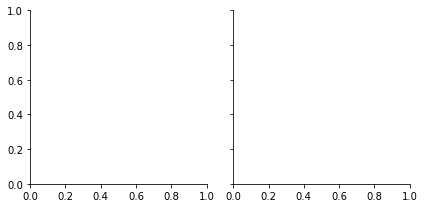

In [21]:
# column을 생존 여부로 나눔
g = sns.FacetGrid(train_df, col = 'Survived')

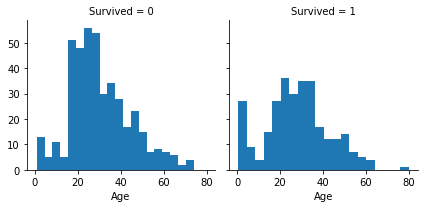

In [22]:
# 히스토그램으로 시각화, 연령의 분포 확인, 히스토그램 bin=20으로 설정. bins로 설정해야 돼
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins=20)
# 약 4세 이하의 생존율이 높음
# 15세 ~ 25세 승객들의 생존율이 높음


In [23]:
# 훈련 자료에서 Pclass와 생존여부에 따른 연령별 분포

# 열을 생존여부, 행과 색을 객실 등급으로 나눔.
# col = Survived / row = Pclass / hue(색) = Pclass
# width = height * aspect

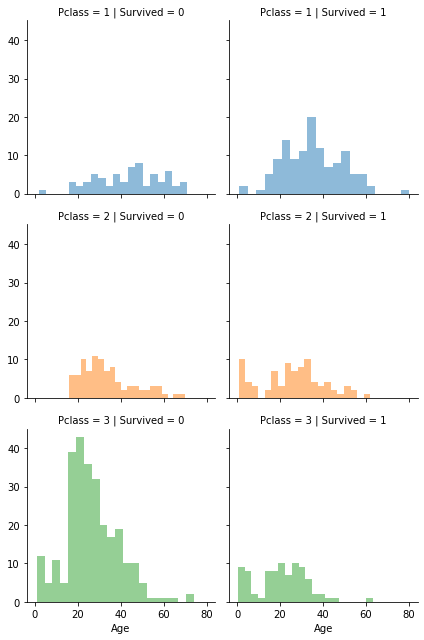

In [24]:
grid = sns.FacetGrid(train_df, col = 'Survived',row = 'Pclass', hue = 'Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

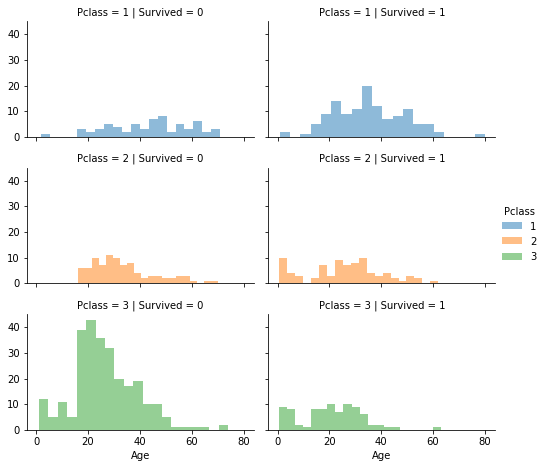

In [25]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20) # 투명도(alpha): 0.5
grid.add_legend();

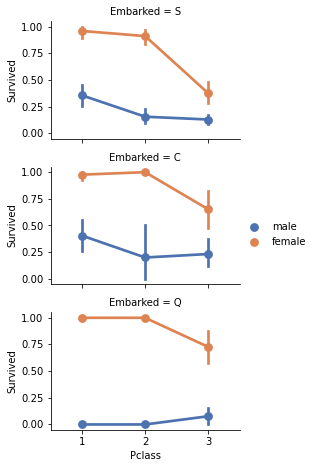

In [26]:
# 승선지와 객실 등급에 따른 생존율 
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex', palette='deep',order = [1,2,3], hue_order=['male','female'])
grid.add_legend()

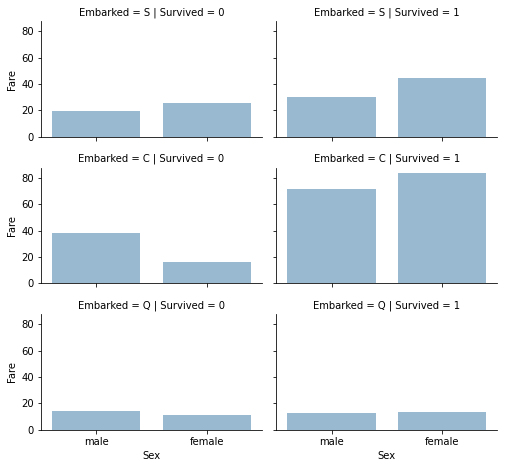

In [27]:
# 승선지, 생존여부, 성별에 따른 요금
grid = sns.FacetGrid(train_df, row='Embarked',col='Survived', height = 2.2,aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=.5, ci=None,order=['male','female'])
grid.add_legend()
# 승선지가 S나 C인 경우 생존한 승객들의 평균 요금이 높음
# 왜 평균 요금에 차이가 나지?

In [28]:
# 데이터 전처리 

In [29]:
# 사용 안할 Ticket과 cabin 제거 
print('before', train_df.shape, test_df.shape)

before (891, 12) (418, 11)


In [30]:
train_df = train_df.drop(['Ticket', 'Cabin'],axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'],axis = 1)
combine = [train_df, test_df]

print('After', train_df.shape,test_df.shape)

After (891, 10) (418, 9)


In [31]:
# print(combine)


In [32]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# 왜 combine에서 가져오는거지? 
# print(dataset)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
# 성별들을 재 범주화
# 위에 성별별 name을 확인해서 해당 단어가 여자인지, 남자인지 판단
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [34]:
# Title 변수를 숫자형으로 변경
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
# mapping 안된 결측값은 0으로 처리 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [35]:
# 최종적으로 안쓸 변수인 name과 passengerid 제거

train_df = train_df.drop(['Name', 'PassengerId'],axis = 1)
test_df = test_df.drop(['Name'],axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape
# test_df.columns

((891, 9), (418, 9))

In [36]:
# 성별 변수를 숫자 범주형 변수로 바꿔줌

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


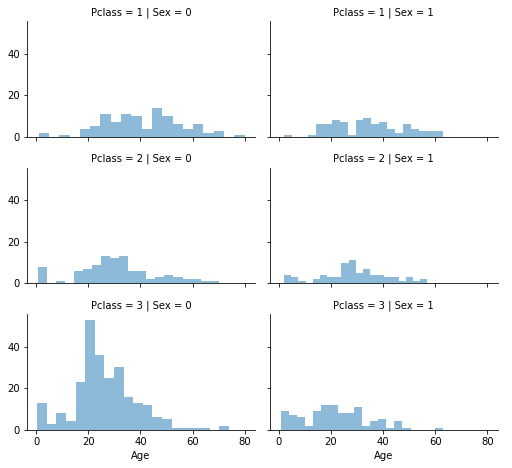

In [37]:
# 객실 등급과 성별 시각화
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2,aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [38]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            # 위에서 guess_ages사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름
            
            age_guess = guess_df.median()

            # age의 random값의 소수점을 .5에 가깝도록 변형
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.isnull().sum()

# age의 결측치가 채워짐

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [39]:
# 연령 변수를 범주형 변수로 바꿔줌

train_df['AgeBand'] = pd.cut(train_df['Age'],5) # 임의로 5개 그룹을 지정
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand',ascending=True)

# 임의로 5개 그룹으로 나눠서 Ageband를 만들고 그 변수별 ageband, survived의정보를 보여줌
# groupby 옵션 재정리

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [40]:
# AgeBand를 바탕으로 Age 변수를 범주형 변수로 바꿔준 뒤,(위의 표 보고)
# AgeBand 변수 삭제 

for dataset in combine:
    dataset.loc[dataset['Age']<= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=32) , 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age']

train_df = train_df.drop(['AgeBand'],axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [41]:
# SibSp와 Parch 를 가족의 동반여부를 알 수 있는 새로운 변수로 통합

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by ='Survived',ascending= False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [42]:
train_df
# FamilySize가 1인 경우는 0+0 +1 이라 가족과 동반하지 않았음을 의미

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,2
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5,1
887,1,1,1,1,0,0,30.0000,S,2,1
888,0,3,1,1,1,2,23.4500,S,2,4
889,1,1,0,1,0,0,30.0000,C,1,1


In [43]:
# 혼자 온 사람의 대한 변수를 새로 생성 
# FamilySize가 1인 사람이면 IsAlone변수에 1을 지정. 나머지는 다 0
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] =1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'],as_index=False).mean()

# 범주가 2개 뿐이라서 groupby에서 따로 sort는 안했음

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [44]:
# 필요 없는 변수 삭제 할거야 
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [45]:
# Age 변수와 Pclass를 곱한 Age*Class 변수 생성
# 왜 하는겨?

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:,['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [46]:
# 승선지를 최빈값으로 대체 
# 결측치에 값을 넣는 과정을 진행 중~ 

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [47]:
# Embarked
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [48]:
# embarked 변수 범주형으로 변경

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1,'Q':2} ).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [49]:
# 요금 변수를 중앙값으로 대체 
# 이거 왜 test를 만지지= 아닌거 같아서 train으로 변경할려고

print(test_df.head())
print(train_df.head())

   PassengerId  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2   7.8292         2      1        1          6
1          893       3    1    2   7.0000         0      3        0          6
2          894       2    0    3   9.6875         2      1        1          6
3          895       3    0    1   8.6625         0      1        1          3
4          896       3    1    1  12.2875         0      3        0          3
   Survived  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1   7.2500         0      1        0          3
1         1       1    1    2  71.2833         1      3        0          2
2         1       3    1    1   7.9250         0      2        1          3
3         1       1    1    2  53.1000         0      3        0          2
4         0       3    0    2   8.0500         0      1        1          6


In [50]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [51]:
# 요금을 숫자 범주형 변수로 바꿔줌

train_df['FareBand'] = pd.cut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='Survived',ascending=True)

# 결과가 좀 이상해서 일단 킵고잉

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
2,"(256.165, 384.247]",0.666667
1,"(128.082, 256.165]",0.724138
3,"(384.247, 512.329]",1.000000


In [52]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [53]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [54]:
# train 데이터셋 준비 완료

In [55]:
## 데이터 준비

In [57]:
# 목적변수 제거 
X_train = train_df.drop('Survived',axis =1)
# 목적 변수 역할 
Y_train = train_df['Survived']
# 예측 대상 데이터 셋
X_test = test_df.drop("PassengerId", axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [59]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

80.36

In [60]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

# 생존 여부 예측에 영향력이 큰 변수는 성별

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [62]:
# SVC Suppor Vector Machines

svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

78.23

In [63]:
# K-NN (K nearest Neighberhood)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [64]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [65]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [66]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

79.12


In [67]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.7

In [68]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [69]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [70]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
6,Stochastic Gradient Decent,80.70
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28


In [71]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [72]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
